In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
uni_cloud = 20.0
uni_ice = 10.0 #on met l'albedo de chaque surface en unité
uni_ocean = 50.0
uni_others = 20 #ensemble des albédo pas fort 

al_cloud = 0.80
al_ice = 0.73 #moyenne de la neige fraîche tassé et glace 
al_ocean = 0.08 #car entre 0.05 et 0.10 on décide de prendre la médianne sup
al_others = 0.14 #albedo autres

#indices des différentes surfaces dans la liste.
ind_ice = 0
ind_ocean = 1
ind_others = 2
ind_cloud = 3

In [3]:
def ini_world(ice, ocean, others, cloud) :
    global world
    world = np.array([ice, ocean, others, cloud])

In [4]:
ini_world(uni_ice, uni_ocean, uni_others, uni_cloud)
world

array([10., 50., 20., 20.])

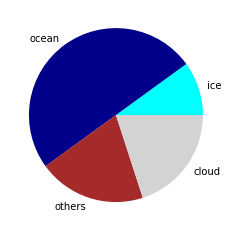

In [5]:
pie_word = plt.pie(world, labels =["ice","ocean","others","cloud"],colors = np.array(["cyan","darkblue","brown","lightgrey"]))

In [6]:
def albedo_wd(world) :
    return np.sum([world[ind_ice]*al_ice, world[ind_ocean]*al_ocean,
                    world[ind_others]*al_others, world[ind_cloud]*al_cloud])/100

In [7]:
albedo_wd(world)

0.301

In [8]:
def equi_temp(albedo) :
    sigma = 5.67*10**(-8)
    I = 1361.0
    return( (I*(1-albedo))/(4*sigma) )**(1/4)

In [9]:
equi_temp(albedo_wd(world))

254.49137177127886

In [10]:
def K_to_C(temp) :
    return temp - 273.15

In [11]:
K_to_C(equi_temp(albedo_wd(world)))

-18.658628228721113

In [12]:
def ice_level(temp, world) : #évolution du niveau de glace selon la température. On fait avec la température de l'air pour simplifier l'étude
    if (world[ind_ice] >= 0 and world[ind_ice] <= 100) and (world[ind_ocean] >= 0 and world[ind_ocean] <= 100) :
        world[ind_ice] -= 0.005*temp
        world[ind_ocean] += 0.005*temp
        
    if world[ind_ice] < 0 :
        world[ind_ice] = 0
    if world[ind_ocean] < 0 :
        world[ind_ocean] = 0

In [13]:
base_sealvl = world[ind_ocean]

def sea_level(world) :
    global base_sealvl
    if base_sealvl+5 >= world[ind_ocean] :
        world[ind_others] -= 1*(abs(base_sealvl-world[ind_ocean])//5)
        world[ind_ocean] += 1*(abs(base_sealvl-world[ind_ocean])//5)
        base_sealvl += 5*int(abs(base_sealvl-world[ind_ocean])//5)
    elif base_sealvl+5 <= world[ind_ocean] :
        world[ind_others] += 1*(abs(base_sealvl-world[ind_ocean])//5)
        world[ind_ocean] -= 1*(abs(base_sealvl-world[ind_ocean])//5)
        base_sealvl += 5*int(abs(base_sealvl-world[ind_ocean])//5)

In [14]:
def ini_lists() :
    global l_albedo
    global l_temp
    global l_ice
    global l_ocean
    
    l_albedo = []
    l_temp = []
    l_ice = []
    l_ocean = []

In [15]:
def year(world,temp=0) :
    tglobal = K_to_C(equi_temp(albedo_wd(world)))+temp
    ice_level(tglobal,world)
    #sea_level(world)

In [16]:
def etude(world,n_years, to_print=True, temp=0.0) :
    e_temp = K_to_C(equi_temp(albedo_wd(world)))

    for i in range(n_years+1) :
        if(to_print):
            print("Anneé "+str(i)+" :\n\tTemperature globale : "+str(e_temp+temp)+"\n\tAlbedo : "+str(albedo_wd(world))+
                  "\n\tProportion de glace : "+str(world[ind_ice])+"\n\tProportion d'eau : "+str(world[ind_ocean])+"\n\n")
        l_albedo.append(albedo_wd(world))
        l_temp.append(e_temp+temp)
        l_ice.append(world[ind_ice])
        l_ocean.append(world[ind_ocean])
        year(world,temp)
        
        e_temp = K_to_C(equi_temp(albedo_wd(world)))

In [17]:
#temp = 0 : ~-19°C
#temp = +33 : ~14°C
#temp = +39 : ~20°C

In [18]:
K_to_C(equi_temp(albedo_wd(world)))+33

14.341371771278887

Anneé 0 :
	Temperature globale : -18.658628228721113
	Albedo : 0.301
	Proportion de glace : 10.0
	Proportion d'eau : 50.0


Anneé 1 :
	Temperature globale : -18.713841096276923
	Albedo : 0.30160640541743344
	Proportion de glace : 10.093293141143606
	Proportion d'eau : 49.906706858856396


Anneé 2 :
	Temperature globale : -18.769253471582232
	Albedo : 0.30221460525306243
	Proportion de glace : 10.186862346624991
	Proportion d'eau : 49.81313765337501


Anneé 3 :
	Temperature globale : -18.82486632165427
	Albedo : 0.30282460599088884
	Proportion de glace : 10.280708613982902
	Proportion d'eau : 49.7192913860171


Anneé 4 :
	Temperature globale : -18.88068061999718
	Albedo : 0.30343641414634265
	Proportion de glace : 10.374832945591173
	Proportion d'eau : 49.62516705440883


Anneé 5 :
	Temperature globale : -18.936697346659827
	Albedo : 0.3040500362664925
	Proportion de glace : 10.469236348691158
	Proportion d'eau : 49.53076365130884


Anneé 6 :
	Temperature globale : -18.992917488294324
	

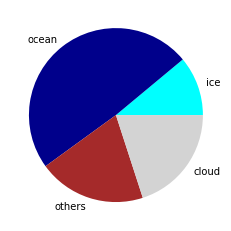

In [19]:
ini_lists()
ini_world(uni_ice, uni_ocean, uni_others, uni_cloud)
#base_sealvl = world[ind_ocean]
etude(world, 10)
pie_word = plt.pie(world, labels =["ice","ocean","others","cloud"],colors = np.array(["cyan","darkblue","brown","lightgrey"]))

In [20]:
def ini_all() :
    ini_world(uni_ice, uni_ocean, uni_others, uni_cloud)
    ini_lists()
    #base_sealvl = world[ind_ocean]

Évolution de différents paramètres en fonction du temps.
Température initiale à ~-19°C


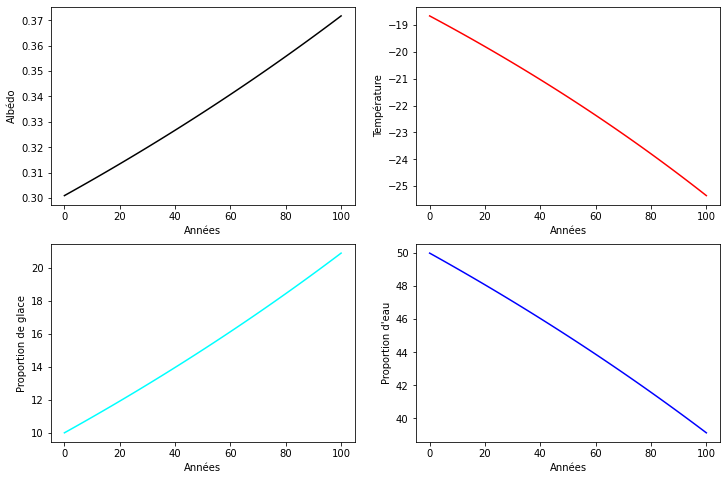

In [21]:
ini_all()
etude(world, 100, False)


plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
plt.ylabel("Albédo")
plt.xlabel("Années")
plt.plot(np.arange(0,len(l_albedo)),l_albedo, 'black')

plt.subplot(2,2,2)
plt.ylabel("Température")
plt.xlabel("Années")
plt.plot(np.arange(0,len(l_temp)),l_temp, 'red')

plt.subplot(2,2,3)
plt.ylabel("Proportion de glace")
plt.xlabel("Années")
plt.plot(np.arange(0,len(l_ice)),l_ice, 'cyan')

plt.subplot(2,2,4)
plt.ylabel("Proportion d'eau")
plt.xlabel("Années")
plt.plot(np.arange(0,len(l_ocean)),l_ocean, 'blue')

print("Évolution de différents paramètres en fonction du temps.\nTempérature initiale à ~"+str(int(np.round(l_temp[0])))+"°C")

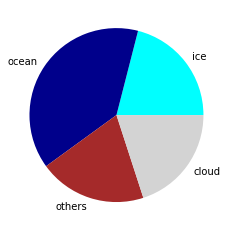

In [22]:
pie_word = plt.pie(world, labels =["ice","ocean","others","cloud"],colors = np.array(["cyan","darkblue","brown","lightgrey"]))

Évolution de différents paramètres en fonction du temps.
Température initiale à ~14°C


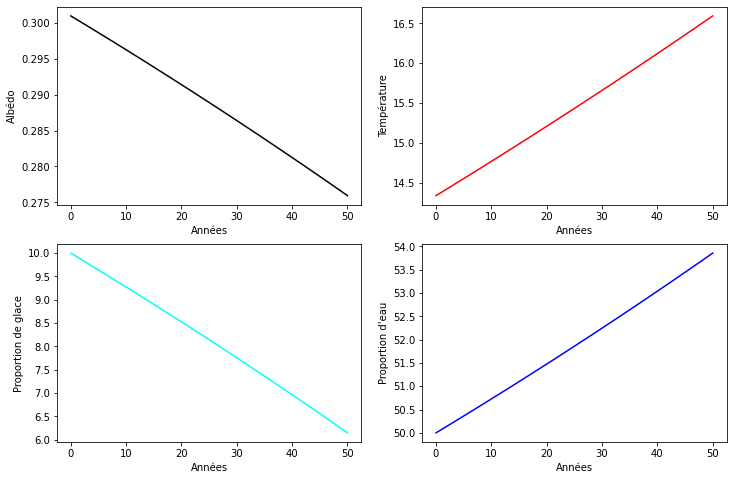

In [23]:
ini_all()
etude(world, 50, False,33)


plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
plt.ylabel("Albédo")
plt.xlabel("Années")
plt.plot(np.arange(0,len(l_albedo)),l_albedo, 'black')

plt.subplot(2,2,2)
plt.ylabel("Température")
plt.xlabel("Années")
plt.plot(np.arange(0,len(l_temp)),l_temp, 'red')

plt.subplot(2,2,3)
plt.ylabel("Proportion de glace")
plt.xlabel("Années")
plt.plot(np.arange(0,len(l_ice)),l_ice, 'cyan')

plt.subplot(2,2,4)
plt.ylabel("Proportion d'eau")
plt.xlabel("Années")
plt.plot(np.arange(0,len(l_ocean)),l_ocean, 'blue')

print("Évolution de différents paramètres en fonction du temps.\nTempérature initiale à ~"+str(int(np.round(l_temp[0])))+"°C")

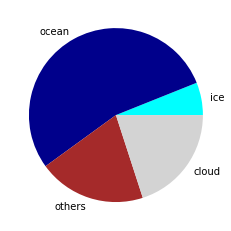

In [24]:
pie_word = plt.pie(world, labels =["ice","ocean","others","cloud"],colors = np.array(["cyan","darkblue","brown","lightgrey"]))

Évolution de différents paramètres en fonction du temps.
Température initiale à ~20°C


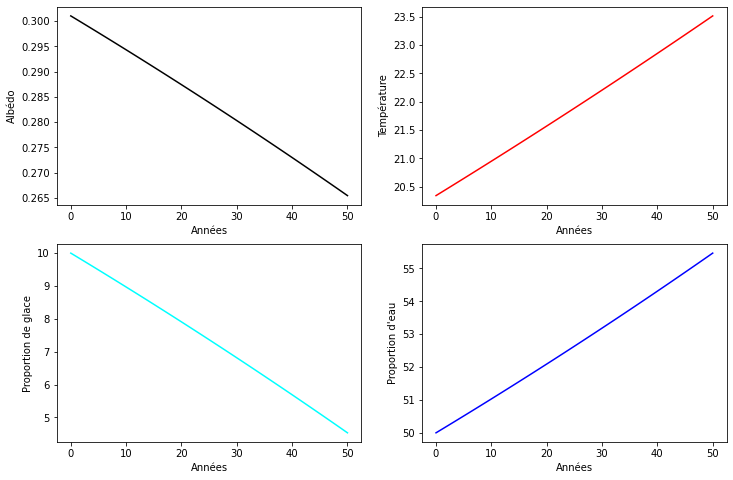

In [25]:
ini_all()
etude(world, 50, False,39)


plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
plt.ylabel("Albédo")
plt.xlabel("Années")
plt.plot(np.arange(0,len(l_albedo)),l_albedo, 'black')

plt.subplot(2,2,2)
plt.ylabel("Température")
plt.xlabel("Années")
plt.plot(np.arange(0,len(l_temp)),l_temp, 'red')

plt.subplot(2,2,3)
plt.ylabel("Proportion de glace")
plt.xlabel("Années")
plt.plot(np.arange(0,len(l_ice)),l_ice, 'cyan')

plt.subplot(2,2,4)
plt.ylabel("Proportion d'eau")
plt.xlabel("Années")
plt.plot(np.arange(0,len(l_ocean)),l_ocean, 'blue')

print("Évolution de différents paramètres en fonction du temps.\nTempérature initiale à ~"+str(int(np.round(l_temp[0])))+"°C")

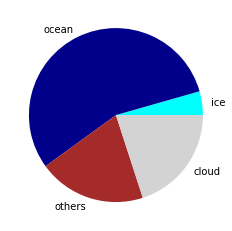

In [26]:
pie_word = plt.pie(world, labels =["ice","ocean","others","cloud"],colors = np.array(["cyan","darkblue","brown","lightgrey"]))

Étude d'autres paramètres.


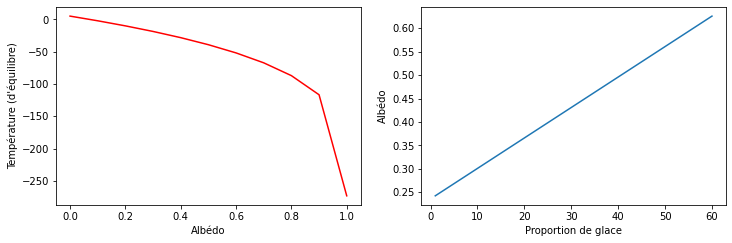

In [27]:
ini_all()
etude(world, 10, False)


plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
plt.ylabel("Température (d'équilibre)")
plt.xlabel("Albédo")
plt.plot(np.arange(0.0, 1.1, 0.1),[K_to_C(equi_temp(np.arange(0.0, 1.1, 0.1)[i])) for i in range(len(np.arange(0.0, 1.1, 0.1)))], 'red')

ini_all()
world[ind_ice] = 60.0
world[ind_ocean] = 0.0
plt.subplot(2,2,2)
plt.ylabel("Albédo")
plt.xlabel("Proportion de glace")
l_albe2 = []
for i in range(int(world[ind_ice])) :
    l_albe2.append(albedo_wd(world))
    world[ind_ice] -= 1
    world[ind_ocean] +=1
plt.plot(np.arange(len(l_albe2),0 ,-1),l_albe2)
print("Étude d'autres paramètres.")